In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import torch

In [2]:
names = os.listdir('data/complex/val')
name = names[0]
img = plt.imread(os.path.join('data/complex/val', name))
label = plt.imread(os.path.join('data/complex/label/val', name))

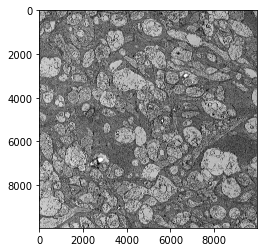

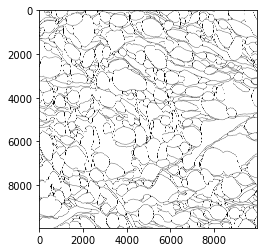

In [3]:
plt.imshow(img)
plt.show()
plt.imshow(label)
plt.show()

In [4]:
shape = img.shape
input = torch.Tensor(img.reshape(1, shape[2], shape[0], shape[1]))
input = input[:,:,0:572,0:572]

In [5]:
from src.models import U_Net
model = U_Net.U_Net()
model = model.cuda(device=0)
input = input.cuda(device=0)

In [6]:
output = model(input)
print(output.shape)

x1 torch.Size([1, 64, 568, 568])
x2 torch.Size([1, 128, 280, 280])
x3 torch.Size([1, 256, 136, 136])
x4 torch.Size([1, 512, 64, 64])
x5 torch.Size([1, 1024, 28, 28])
torch.Size([56, 56])
torch.Size([1, 512, 56, 56])
torch.Size([1, 2, 388, 388])


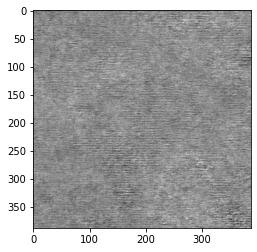

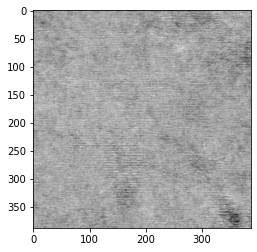

In [8]:
np_out = output.cpu().detach().numpy().squeeze()
plt.imshow(np_out[0], cmap='gray')
plt.show()
plt.imshow(np_out[1], cmap='gray')
plt.show()